# PREDICTION OF  BEST FIT GARMENT FOR CUSTOMER

In [1]:
import json            #Aliasing
import os
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

os.chdir("C:\\Users\\Home\\Desktop\\Prescient- Automation")
os.listdir()

['customer_details.json', 'dataset.json', 'task.pdf']

## Importing Garment Data set

In [2]:
Garmentdata=pd.read_json("dataset.json",lines=True)

## Creating New Data Frame with Dropped Nan Values 

In [3]:
Data=Garmentdata.dropna(axis=0,how="any")
Data=Data.rename(columns={"cup size":"cup_size","shoe size":"shoe_size","shoe width":"shoe_width","bra size":"bra_size"})

## Checking for Misiing Values 

In [4]:
Data.isnull().sum().sum()

0

## Understanding of Data

Data.info()

In [6]:
Data.describe() 

,bra_size,hips,item_id,quality,shoe_size,size,user_id,waist
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,35.107692,40.205769,469902.419231,4.240385,8.100000,10.651923,527078.598077,31.030769
std,2.941291,4.772873,193039.061854,0.948533,1.848449,6.463175,286720.883138,4.662710
min,28.000000,30.000000,154411.000000,1.000000,5.000000,1.000000,1807.000000,22.000000
25%,34.000000,37.000000,302857.000000,4.000000,7.000000,8.000000,300859.750000,28.000000
50%,34.000000,39.000000,471620.000000,5.000000,8.000000,8.000000,528979.000000,30.000000
75%,36.000000,42.000000,645888.500000,5.000000,9.000000,12.250000,784264.000000,34.000000
max,46.000000,60.000000,807384.000000,5.000000,38.000000,38.000000,998734.000000,50.000000


## Checking for Unique Values for Object Data Types

print(Data.bra_size.unique())
print(Data.bust.unique())
print(Data.category.unique())
print(Data.cup_size.unique ())
print(Data.fit.unique())
print(Data.height.unique())
print(Data.hips.unique())
print(Data.length.unique())
print(Data.shoe_width.unique())
print(Data.quality.unique())

In [8]:
Data=Data.drop(["review_summary","review_text","user_id","user_name"],axis="columns")

## One Hot Encoding for catgorical values

In [9]:
Data_dummies=pd.get_dummies(Data,columns=["bra_size","bust","category","cup_size","fit","height","hips","length","quality","shoe_size","shoe_width","waist","size"],drop_first=True)
Data_dummies.sample(2)

,item_id,bra_size_30.0,bra_size_32.0,bra_size_34.0,bra_size_36.0,bra_size_38.0,bra_size_40.0,bra_size_42.0,bra_size_44.0,bra_size_46.0,...,size_11,size_12,size_13,size_15,size_18,size_20,size_26,size_32,size_33,size_38
71869,749759,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
38271,418224,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Checking For Co_relation Matrix

In [10]:
corrmatrix=Data_dummies.corr()
corrmatrix.head(2)

,item_id,bra_size_30.0,bra_size_32.0,bra_size_34.0,bra_size_36.0,bra_size_38.0,bra_size_40.0,bra_size_42.0,bra_size_44.0,bra_size_46.0,...,size_11,size_12,size_13,size_15,size_18,size_20,size_26,size_32,size_33,size_38
item_id,1.000000,0.009574,-0.054754,0.007176,-0.007000,0.029740,-0.018746,0.044895,0.009107,0.044511,...,-0.072319,0.058420,-0.070174,0.079218,-0.099493,0.070005,0.016930,-0.002161,-0.070174,0.008326
bra_size_30.0,0.009574,1.000000,-0.098797,-0.126747,-0.109545,-0.087162,-0.042037,-0.030739,-0.021608,-0.012427,...,-0.015235,-0.028444,-0.008779,-0.046216,-0.012427,-0.048606,-0.042037,-0.025000,-0.008779,-0.008779


In [11]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df    

In [12]:
threshold = 0.10
corr_value = getCorrelatedFeature(corrmatrix['item_id'], threshold)
corr_value.index.values

array(['item_id', 'category_dresses', 'category_outerwear',
       'category_sale', 'category_tops', 'cup_size_b', 'shoe_size_6.0',
       'shoe_size_7.5', 'waist_30.0', 'size_4'], dtype=object)

In [13]:
correlated_data =corrmatrix[corr_value.index]
correlated_data.sample(3)

,item_id,category_dresses,category_outerwear,category_sale,category_tops,cup_size_b,shoe_size_6.0,shoe_size_7.5,waist_30.0,size_4
cup_size_c,0.077175,0.003679,0.016159,-0.063884,-0.013405,-0.322832,0.008169,-0.070666,-0.050415,0.115116
size_12,0.058420,-0.087323,0.092484,-0.013761,0.072844,-0.001467,-0.084060,0.066840,0.242533,-0.229498
height_5ft 1in,0.010723,-0.061852,-0.036768,0.038300,0.045491,-0.062806,-0.042037,-0.055227,-0.078881,0.017518


In [14]:
x=correlated_data.drop("item_id",axis=1)
y=correlated_data[["item_id"]]

## Model Profiling: Spliting the Data into Train nd Test

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

## Model Building Using Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

predicted_op=LR.predict(x_test)

## Creating Residuals (Actual-Predicted)

In [17]:
Residuals=y_test -predicted_op
Residuals.head(2)

,item_id
bust_56,0.016303
waist_37.0,-0.002857


## Model Validation /Model Fit
- Higher the Rsquare
- Lower the MAPE (Mean absolute error/Mean absolute percentage)
- Good Fit Chart

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 

aa=r2_score(y_test,predicted_op)
bb=mean_absolute_error(y_test,predicted_op)
cc=mean_squared_error(y_test,predicted_op)

print("Rsquare value :",aa) 
print("MAE value:" ,bb)
print("MAP value:",cc)

Rsquare value : 0.524660770174177
MAE value: 0.027480507211435187
MAP value: 0.0019861346382916427


** My model Explaining 52 % of Variation in my model **

# Assumption of Linear Regression
1.Residuals should have Constant Variance 

2.Residuals Normaley Distributed

3.Linearitey  :scatterplot(Residuals vs Each IDV)

4.VIF  (Less then 60%)

5.Good Fit cahart :( predicted_op vs Actual_op /y_test) 

In [19]:
Residuals=predicted_op-y_test
Residuals.sample(2)

,item_id
waist_33.0,-0.028110
bust_43,-0.015975


### 1.Constant Variance Checking : scatterplot(Residuals,predicted_op) : No pattern in Variance :Homoscedasity

Text(0.5, 1.0, 'Varience checking:Homoscedasity')

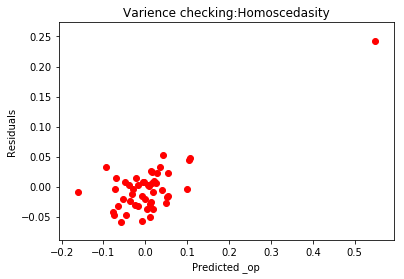

In [20]:
plt.scatter(predicted_op,Residuals,c="r")
plt.xlabel("Predicted _op")
plt.ylabel("Residuals")
plt.title("Varience checking:Homoscedasity")

- The Constant Variance of the model should be Homoscadasity,still above plot is little Funnel Shape (Hetroscadasity)
- Homoscadasity :No shape in the model,
- Hetroscadasity :Funnel shape

### 2.Residuals should be  Noramley Distributed :symetrical :Mirror image of Residuals

Text(0.5, 0.98, 'Residuals are Normaley Distributed')

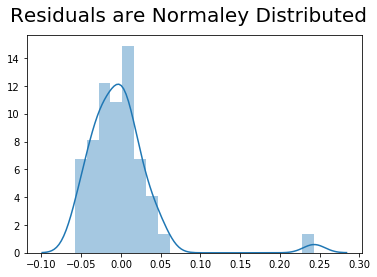

In [21]:
sns.distplot((Residuals), bins = 20)
plt.suptitle('Residuals are Normaley Distributed', fontsize = 20)       # Plot heading 

### 3.Good Fit chart

Text(0.5, 1.0, 'Actual vs Predicted op')

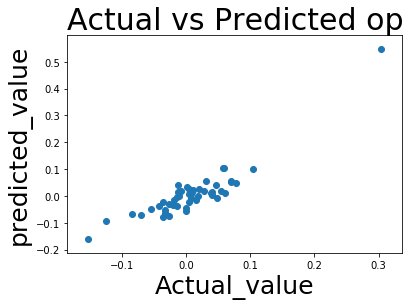

In [23]:
plt.scatter(y_test,predicted_op)
plt.xlabel("Actual_value",fontsize=25)
plt.ylabel("predicted_value",fontsize=25)
plt.title("Actual vs Predicted op",fontsize=30)

In [24]:
print(type(y_test))
print(type(predicted_op))
predicted_op=pd.DataFrame(predicted_op)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [25]:
model_op=pd.concat([y_test,predicted_op],axis=1)
model_op.sample(2)

,item_id,0
33,NaN,0.014289
quality_5.0,-0.041644,NaN
